# Problem Set 2 CS174
---
The following problem set will focus on the lessons on Numpy and advanced Python functions. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**

2. Present a count plot of the top 20 occurring words in **data/networks.txt**. Use the stopword file **data/stop.txt** to filter out the stopwords **2 pts.**

3. Using **data/ateneo.txt** and **data/tl-en.txt**, convert the phrases into straight english phrases. Leave words with no translation be. **6 pts.**

4. Using **data/tl-en.txt**, create a one-to-one English to Filipino translation of your favorite English song. Develop functions to handle pluralities, and multiple entry results. Discuss your code and please put at least 1-liner docs for the functions. **10 pts.**
       
### Bonus:
Repeat #4 but do a Filipino to English translation of your favorite Filipno song. Same specs apply. **5 pts.**

Deadline **Feb 20 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

In [1]:
import numpy as np

### Problem 1
Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**

In [2]:
def randomMatrix(n, a, b):
    b_prime = np.nextafter(b,b+1)  # [a, b') = [a,b]
    return np.random.rand(n,n)*(b_prime-a) + a #[0,1) * (b'-a) = [0, b-a]

In [3]:
print(randomMatrix(3,1,10))
print(randomMatrix(4,20,20))
print(randomMatrix(5,10,11))

[[2.39941346 6.96637743 6.17383997]
 [4.37627439 3.29130568 2.18643873]
 [5.72817185 7.65398421 2.4454089 ]]
[[20. 20. 20. 20.]
 [20. 20. 20. 20.]
 [20. 20. 20. 20.]
 [20. 20. 20. 20.]]
[[10.92033616 10.1120785  10.75850591 10.40475091 10.32744881]
 [10.98708217 10.50001945 10.21854459 10.03170063 10.51443266]
 [10.13870562 10.86840404 10.54247082 10.04257865 10.70026222]
 [10.53305881 10.06832364 10.89474626 10.58193383 10.07430743]
 [10.37324843 10.06098161 10.4511548  10.5148885  10.98053705]]


### Problem 2
Present a count plot of the top 20 occurring words in **data/networks.txt**. Use the stopword file **data/stop.txt** to filter out the stopwords **2 pts.**

This function cleans uses whitepace and punctuation to convert an array of lines of text into an array of words.

In [4]:
import string
def getWordList(lines):
    wordlist = []
    for line in lines:
        # split to remove whitespace.
        for word in line.split():
            # transform to lowercase, remove leading/trailing punctuation.
            word = word.lower().strip(string.punctuation)
            wordlist.append(word)
    return wordlist

We obtain the wordlist of `networks.txt`.

In [5]:
f = open('data/networks.txt', 'r')
num2_data = f.readlines()
f.close()
num2_word_list = getWordList(num2_data)

We concatenate all the words into a single string, so we can leave the word splitting to a Python package. This cleans up _some_ of the dirty data.

In [6]:
num2_joined = ''.join(num2_word_list)
num2_joined[:50]

'disadvantagesandadvantagesofnetworkssincethefirstc'

We use WordNinja (install: `pip install wordninja`) to probabilistically perform word segmentation based on a built-in model of word frequencies.

In [7]:
import wordninja
num2_word_list = wordninja.split(num2_joined)
num2_word_list[:10]

['disadvantages',
 'and',
 'advantages',
 'of',
 'networks',
 'since',
 'the',
 'first',
 'concoction',
 'of']

Next, we filter out the stop words.

In [8]:
f = open('data/stop.txt', 'r')
stop_words_data = f.readlines()
f.close()
stop_words = getWordList(stop_words_data)
num2_word_list = list(filter(lambda x: x not in stop_words, num2_word_list))
num2_word_list[:10]

['disadvantages',
 'advantages',
 'since',
 'first',
 'concoction',
 'nexus',
 'computational',
 'processing',
 'power',
 'late']

We now use modified versions of the functions from PS1 to present a count plot of the top 20 occurring words in **data/networks.txt**. 

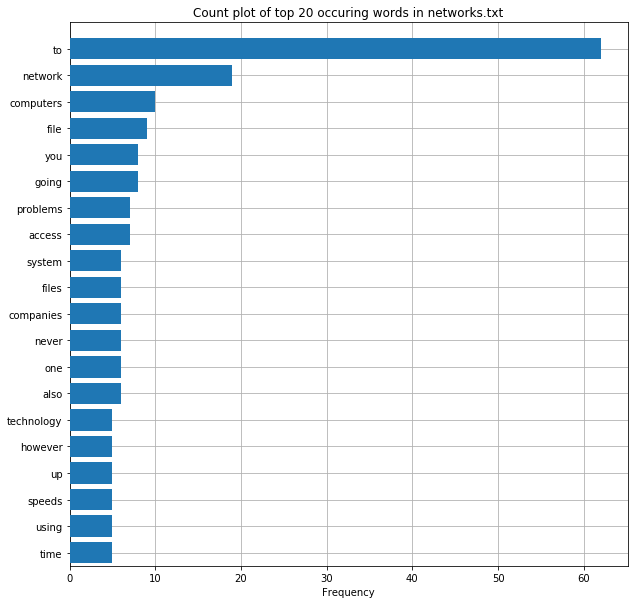

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def getFreqDict(wordlist):
    frequency_dict = {}
    for word in wordlist:
        if word in frequency_dict:
            frequency_dict[word] += 1
        else:
            frequency_dict[word] = 1
    return frequency_dict

def plotFreqDict(frequency_dict, lim = None):
    words, freqs = zip(*frequency_dict.items()) 

    if lim is None:
        lim = range(len(frequency_dict))
    indSort = np.argsort(freqs)
    words = np.array(words)[indSort]
    freqs = np.array(freqs)[indSort]

    
    plt.barh(range(len(frequency_dict)), freqs,zorder=3)
    plt.grid(True,zorder=0)
    plt.yticks(range(len(words)), words)
    plt.ylim(len(words)-lim-0.5,len(words))
    plt.xlabel('Frequency')
    plt.plot()

plt.rcParams['figure.figsize'] = [10, 10]
plt.title('Count plot of top 20 occuring words in networks.txt')
plotFreqDict(getFreqDict(num2_word_list), lim=20)
plt.show()

### Problem 3
Using **data/ateneo.txt** and **data/tl-en.txt**, convert the phrases into straight english phrases. Leave words with no translation be. **6 pts.**

We load the data files. For the TL->EN dictionary, to handle one-to-many mappings, we create a dictionary which maps a TL word to a list of EN candidate translations. A similar procedure is used for the EN->TL dictionary.

In [10]:
import nltk
%pprint

Pretty printing has been turned OFF


In [11]:
f = open('data/ateneo.txt', 'r')
num3_ateneo = f.readlines()
f.close()
f = open('data/tl-en.txt', 'r', errors='ignore')
tlen_data = f.readlines()
f.close()

In [12]:
tlen_dictionary = {}
entl_dictionary = {}
for pair in tlen_data:
    tl, en, *rest = pair.split()
    if tl in tlen_dictionary:
        tlen_dictionary[tl].append(en)
    else:
        tlen_dictionary[tl] = [en]
        
    if en in entl_dictionary:
        entl_dictionary[en].append(tl)
    else:
        entl_dictionary[en] = [tl]

We form a bag of words using a corpus provided in NLTK.

First, we obtain a list of unique words in the corpus. No stopwords are filtered and no lemmatization is applied, since `tl-en.txt` contains conjugated words and stopwords.

To reduce the list size, we ignore words that only occur once.

In [13]:
%%time
import collections
from nltk.corpus import brown
raw_sentences = [' '.join(sent) for sent in brown.sents()]
corpus_unique_words = getWordList(raw_sentences)
d = collections.defaultdict(int)
for x in corpus_unique_words: d[x]+=1
corpus_unique_words = set([x for x in d.keys() if d[x]>1])
corpus_unique_words.discard('')
corpus_unique_words = list(corpus_unique_words)
print(len(corpus_unique_words))

27586
Wall time: 5.09 s


In [14]:
import re
# only keep words with some alphabetical character
corpus_unique_words = list(filter(lambda x: re.search('[a-zA-Z]', x), corpus_unique_words))
print(len(corpus_unique_words))

27009


In [15]:
len(raw_sentences)

57340

This function `vectorize` converts a sentence to a bag-of-words-like vector with respect to the given set of unique words. Instead of being one-hot-encoded, the word frequencies are recorded.

In [16]:
def vectorize(unique_word_set, sentence):
    freq_dict = {}
    for word in unique_word_set:
        freq_dict[word] = 0
    for word in sentence.split():
            # transform to lowercase, remove leading/trailing punctuation.
            word = word.lower().strip(string.punctuation)
            if word in freq_dict:
                freq_dict[word] += 1
    return np.array(list(freq_dict.values()))

We test the `vectorize` function by seeing the words encoded by the vector for the first sentence.

In [17]:
%%time
print(' '.join(brown.sents()[0]))
vec = vectorize(corpus_unique_words, ' '.join(brown.sents()[0]))
for x in range(len(vec)):
    if vec[x] > 0:
        print(corpus_unique_words[x])

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .
fulton
the
friday
county
investigation
no
recent
primary
that
any
grand
of
election
evidence
atlanta's
irregularities
place
jury
took
produced
an
said
Wall time: 130 ms


We get the **average** of some vectors and name this vector `ave_vector`.

In [18]:
%%time
ave_vector = np.zeros(len(corpus_unique_words))
for sent in brown.sents()[:1000]:
    ave_vector += vectorize(corpus_unique_words, ' '.join(sent))
ave_vector/=1000

Wall time: 6.34 s


In [19]:
ave_vector

array([0., 0., 0., ..., 0., 0., 0.])

These return the punctuation which would be stripped from the left and from the right of a string.

In [20]:

def lstripped(s):
    s = s + "-?-"
    return s.replace(s.lstrip(string.punctuation), '')

def rstripped(s):
    s = "-?-" + s 
    return s.replace(s.rstrip(string.punctuation), '')


This restores the punctuation of a capitalization of a word given a template word as a pattern.

In [21]:
def restore_format(source, pattern):
    if pattern.strip(string.punctuation)[0].isupper():
        return lstripped(pattern) + source[0].upper() + source[1:] + rstripped(pattern)
    else:
        return lstripped(pattern) + source + rstripped(pattern)

This function chooses the translation candidate for a word in a sentence based on the vector distance between the resulting sentence and `ave_vector`.

In [22]:
def choose_translation(candidates, sentence, debug=True):
    raw_sentence = ' '.join(['' if isinstance(x,list) else x for x in sentence])
    min_dist = float("inf")
    min_x = candidates[0]
    for x in candidates:
        dist = np.linalg.norm(vectorize(corpus_unique_words, raw_sentence + " " + x) - ave_vector)
        if debug: print(x, dist)
        if dist < min_dist:
            min_dist = dist
            min_x = x
    return min_x

We translate the sentences using the following steps.
1. For every sentence, we first split into words, then apply the dictionary.
 
2. If a word in the sentence matches a TL word in the dictionary, we first replace it with the list of possible EN candidates.

3. If there is only one EN candidate, we apply the dictionary directly. We do this first in order to increase the English information in the sentence, which would assist in the next step.

4. To handle cases where there are multiple EN translations for a single TL word, we choose a word depending on the  distance between `ave_vector` and the resulting vector if the sentence was vectorized with a given translation choice.

5. We restore the original punctuation and capitalization of the sentence by looking at the formatting of the corresponding word in the source sentence.

In [23]:
for sentence in num3_ateneo:
    print("Sentence:", sentence.strip(string.whitespace))
    raw_word_list = sentence.strip(string.whitespace).split()
    word_list = [x.strip(string.punctuation).lower() for x in raw_word_list]
    print("Step 1:\t", word_list)
    translated_sentence = [tlen_dictionary[x]  if x in tlen_dictionary else x for x in word_list]
    print("Step 2:\t", translated_sentence)
    
    translated_sentence = [x[0] if isinstance(x,list) and len(x)==1 else x for x in translated_sentence]
    print("Step 3:\t", translated_sentence)
    
    translated_sentence = [choose_translation(x,translated_sentence) if isinstance(x,list) else x for x in translated_sentence]
    print("Step 4:\t", translated_sentence)
    
    translated_sentence = ' '.join([restore_format(translated_sentence[i], raw_word_list[i]) for i in range(len(raw_word_list))])
    print("Step 5:\t", translated_sentence)
    print()

Sentence: "Manong, para lang d'yan sa may side."
Step 1:	 ['manong', 'para', 'lang', "d'yan", 'sa', 'may', 'side']
Step 2:	 ['manong', ['to'], ['only'], "d'yan", 'sa', ['there', 'have'], 'side']
Step 3:	 ['manong', 'to', 'only', "d'yan", 'sa', ['there', 'have'], 'side']
there 2.6646296177893154
have 2.659746416484104
Step 4:	 ['manong', 'to', 'only', "d'yan", 'sa', 'have', 'side']
Step 5:	 "Manong, to only d'yan sa have side."

Sentence: "Mej hassle naman this rain."
Step 1:	 ['mej', 'hassle', 'naman', 'this', 'rain']
Step 2:	 ['mej', 'hassle', ['naman'], 'this', 'rain']
Step 3:	 ['mej', 'hassle', 'naman', 'this', 'rain']
Step 4:	 ['mej', 'hassle', 'naman', 'this', 'rain']
Step 5:	 "Mej hassle naman this rain."

Sentence: "Ano, bro? Katip later? G?"
Step 1:	 ['ano', 'bro', 'katip', 'later', 'g']
Step 2:	 [['what'], ['bro'], 'katip', 'later', 'g']
Step 3:	 ['what', 'bro', 'katip', 'later', 'g']
Step 4:	 ['what', 'bro', 'katip', 'later', 'g']
Step 5:	 "What, bro? Katip later? G?"

Senten

Same as above, but without debug text.

In [24]:
for sentence in num3_ateneo:
    print("Sentence:", sentence.strip(string.whitespace))
    raw_word_list = sentence.strip(string.whitespace).split()
    word_list = [x.strip(string.punctuation).lower() for x in raw_word_list]
    translated_sentence = [tlen_dictionary[x]  if x in tlen_dictionary else x for x in word_list]
    translated_sentence = [x[0] if isinstance(x,list) and len(x)==1 else x for x in translated_sentence]
    translated_sentence = [choose_translation(x,translated_sentence,debug=False) if isinstance(x,list) else x for x in translated_sentence]
    translated_sentence = ' '.join([restore_format(translated_sentence[i], raw_word_list[i]) for i in range(len(raw_word_list))])
    print("Result:\t", translated_sentence)
    print()

Sentence: "Manong, para lang d'yan sa may side."
Result:	 "Manong, to only d'yan sa have side."

Sentence: "Mej hassle naman this rain."
Result:	 "Mej hassle naman this rain."

Sentence: "Ano, bro? Katip later? G?"
Result:	 "What, bro? Katip later? G?"

Sentence: "Wait, I'm like gonna dinner lang with the fambam."
Result:	 "Wait, I'm like gonna dinner only with the fambam."

Sentence: "Which car am I gonna take today kaya?"
Result:	 "Which car am I gonna take today so?"

Sentence: "Don't make tusok sa fishball muna, it's not lutong yet."
Result:	 "Don't make stitch sa fishball muna, it's not cuisine yet."

Sentence: "Kuya magkano po yung neon balls?"
Result:	 "Brother much po the neon balls?"

Sentence: "Pweds ka ba later?"
Result:	 "Pweds ka ba later?"

Sentence: "Ugh, there's no parking space pa. Eh, I'm late na nga."
Result:	 "Ugh, there's no parking space pa. Eh, I'm late na nga."

Sentence: "It's like, super intense talaga. As in grabe."
Result:	 "It's like, super intense really. 

### Problem 4
Using **data/tl-en.txt**, create a one-to-one English to Filipino translation of your favorite English song. Develop functions to handle pluralities, and multiple entry results. Discuss your code and please put at least 1-liner docs for the functions. **10 pts.**

We use the song You're the Inspiration, by Chicago.

In [25]:
# f = open('data/inspiration.txt', 'r')
# num4_song = f.readlines()
# f.close()

In [26]:
num4_song = ['You know our love was meant to be\n', 'The kind of love that lasts forever\n', 'And I want you here with me\n', 'From tonight until the end of time\n', '\n', 'You should know,\n', 'Everywhere I go\n', 'Always on my mind,\n', 'In my heart\n', 'In my soul\n', '\n', 'Baby\n', '\n', '[Chorus:]\n', "You're the meaning in my life\n", "You're the inspiration\n", 'You bring feeling to my life\n', "You're the inspiration\n", 'Wanna have you near me\n', "I wanna have you hear me sayin'\n", 'No one needs you more than I need you\n', '\n', "And I know, yes I know that it's plain to see\n", "We're so in love when we're together\n", 'Now I know that I need you here with me\n', 'From tonight until the end of time\n', '\n', 'You should know,\n', 'Everywhere I go\n', 'Always on my mind,\n', "You're in my heart\n", 'In my soul\n']

Instead of using just the dictionary like in number 3, we have a function to translate a word.

We use NLTK's WordNet to lemmatize the word.
If it is a plural noun, we convert it into a root word, translate it if possible, and prepend `"mga"`.

In [27]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def entl_translate_word(en_word):
    lemma = wnl.lemmatize(en_word, 'n')
    plural = True if en_word is not lemma else False
    if plural:
        if lemma in entl_dictionary:
            return ['mga', entl_dictionary[lemma]]
        else:
            return ['mga', lemma]
    else:
        if en_word in entl_dictionary:
            return [entl_dictionary[en_word]]
        else:
            return [en_word]

Test runs of `entl_translate_word`.

In [28]:
print(entl_translate_word('books'))
print(entl_translate_word('book'))
print(entl_translate_word('people'))
print(entl_translate_word('person'))
print(entl_translate_word('give'))
print(entl_translate_word('beds'))

['mga', ['aklat', 'book', 'libro']]
[['aklat', 'book', 'libro']]
[['tao']]
[['tao', 'taong', 'person']]
[['magbigay', 'ibigay']]
['mga', ['kama']]


We then translate using the same method as problem 3.

Ideally, we would have a Filipino corpus and use that as a basis to decide which of multiple translation options is better, by comparing distances of binary vectors. (see `choose_translation()`)

However, due to lack of time and not being able to find a suitable corpus in time, we instead just pick the first translation candidate.

In [29]:
import string
translated_song = []
for sentence in num4_song:
    raw_word_list = sentence.strip(string.whitespace).split()
    word_list = [x.strip(string.punctuation).lower() for x in raw_word_list]
    
    translated_sentence = []
    for x in word_list:
        for word in entl_translate_word(x):
            translated_sentence.append(word)
    
    translated_sentence = [x[0] if isinstance(x,list) and len(x)==1 else x for x in translated_sentence]
    translated_sentence = [x[0] if isinstance(x,list) else x for x in translated_sentence]
    
    translated_sentence = ' '.join([restore_format(translated_sentence[i], raw_word_list[i]) for i in range(len(raw_word_list))])
    print(translated_sentence)

Ikaw kilala ating love mga wa sinadya para
Ang mabait of love yan mga huling
And I nais ikaw dito kay me
Mula tonight hanggang ang dulo of panahon

Ikaw dapat kilala,
Dako I pumunta
Laging noong my isip,
Nasa my puso
Nasa my kaluluwa

Sanggol

[Chorus:]
You're ang kahulugan nasa my buhay
You're ang inspirasyon
Ikaw dalhin pakiramdam para my buhay
You're ang inspirasyon
Wanna may ikaw malapit me
I wanna may ikaw marinig me sayin'
Walang isa mga kailangan ikaw pang Kaysa i kailangan

And I kilala, opo I kilala yan it's payak para tingnan
We're kaya nasa love kapag we're sama
Ngayon I kilala yan I kailangan ikaw dito kay me
Mula tonight hanggang ang dulo of panahon

Ikaw dapat kilala,
Dako I pumunta
Laging noong my isip,
You're nasa my puso
Nasa my kaluluwa


### Bonus
Repeat #4 but do a Filipino to English translation of your favorite Filipno song. Same specs apply. **5 pts.**

In [34]:
# f = open('data/kundiman.txt', 'r', errors='ignore')
# num5_song = f.readlines()
# f.close()

In [33]:
num5_song = ['Para kang asukal\n', 'Sintamis mong magmahal\n', 'Para kang Pintura\n', 'Buhay ko ikaw ang nagpinta\n', 'Para kang unan\n', 'Pinapainit mo ang aking tiyan\n', 'Para kang kumot\n', "Na yumayakap sa tuwing ako'y nalulungkot\n", '\n', "Kaya't wag magtataka\n", 'Kung bakit ayaw kitang mawala\n', '\n', 'Kung hindi man tayo hanggang dulo\n', 'Wag mong kalimutan\n', 'Nandito lang ako\n', 'Laging umaalalay\n', 'Hindi ako lalayo\n', 'Dahil ang tanging panalangin ko ay ikaw\n', '\n', 'Di baleng maghapon na umulan\n', "Basta't ikaw ang sasandalan liwanag\n", 'Ng lumulubog na araw\n', 'Kay sarap pagmasdan\n', 'Lalo na kapag nasisinagan ang iyong mukha\n', 'Ayoko nang magsawa\n', 'Hinding hindi magsasawa sa iyo\n', '\n', "Kaya't wag magtataka\n", 'Kung bakit ayaw kitang mawala\n', '\n', 'Kung hindi man tayo hanggang dulo\n', 'Wag mong kalimutan\n', 'Nandito lang ako\n', 'Laging umaalalay\n', 'Hindi ako lalayo\n', 'Dahil ang tanging panalangin ko\n', '\n', 'Bahala na ayoko muna magsalita\n', 'Hayaan na muna natin\n', 'Ang daloy ng tadhana\n', '\n', 'Kung hindi man tayo hanggang dulo\n', 'Wag mong kalimutan\n', 'Nandito lang ako\n', 'Laging umaalalay\n', 'Hindi ako lalayo\n', '\n', 'Kung hindi man tayo hanggang dulo\n', 'Wag mong kalimutan\n', 'Nandito lang ako\n', 'Laging umaalalay\n', 'Hindi ako lalayo\n', '\n', 'Dahil ang tanging panalangin\n', 'Dahil ang tanging panalanigin ko ay ikaw ']

['Para kang asukal\n', 'Sintamis mong magmahal\n', 'Para kang Pintura\n', 'Buhay ko ikaw ang nagpinta\n', 'Para kang unan\n', 'Pinapainit mo ang aking tiyan\n', 'Para kang kumot\n', "Na yumayakap sa tuwing ako'y nalulungkot\n", '\n', "Kaya't wag magtataka\n", 'Kung bakit ayaw kitang mawala\n', '\n', 'Kung hindi man tayo hanggang dulo\n', 'Wag mong kalimutan\n', 'Nandito lang ako\n', 'Laging umaalalay\n', 'Hindi ako lalayo\n', 'Dahil ang tanging panalangin ko ay ikaw\n', '\n', 'Di baleng maghapon na umulan\n', "Basta't ikaw ang sasandalan liwanag\n", 'Ng lumulubog na araw\n', 'Kay sarap pagmasdan\n', 'Lalo na kapag nasisinagan ang iyong mukha\n', 'Ayoko nang magsawa\n', 'Hinding hindi magsasawa sa iyo\n', '\n', "Kaya't wag magtataka\n", 'Kung bakit ayaw kitang mawala\n', '\n', 'Kung hindi man tayo hanggang dulo\n', 'Wag mong kalimutan\n', 'Nandito lang ako\n', 'Laging umaalalay\n', 'Hindi ako lalayo\n', 'Dahil ang tanging panalangin ko\n', '\n', 'Bahala na ayoko muna magsalita\n', 'Haya